# Exercise Twelve: Texts, Three Ways

For this week, you will sample the three methods we've explored (topic modeling, sentiment analysis, and Markov chain generation) using the same set of root texts.

- Collect and import ten documents (novels work best, but anything goes!)
- Using the topic modeling code as a starter, build a topic model of the documents
- Using the sentiment analysis code as a starter, run a sentiment analysis on sample fragments from the documents and compare
- Using the Markov chain code as a starter, generate a sentence using one of the documents
- Using the Markov chain code as a starter, generate a longer text fragment using all of the documents

As a bonus, try to extend this analysis to note other features of these documents using any of our previous exercises as a starting point.

## Collect and import ten documents

Using the same group of philosphy texts as Exercise Eleven.

In [1]:
import pandas as pd
import os
import numpy as np

documents = []
path = 'PhilosophyTexts/'

filenames=sorted([os.path.join(path, fn) for fn in os.listdir(path)])
print(len(filenames)) 
print(filenames[:11]) 

12
['PhilosophyTexts/Artistotle.txt', 'PhilosophyTexts/Descartes.txt', 'PhilosophyTexts/Dewey.txt', 'PhilosophyTexts/Hume.txt', 'PhilosophyTexts/Kant.txt', 'PhilosophyTexts/Locke.txt', 'PhilosophyTexts/Machiavelli.txt', 'PhilosophyTexts/Marx.txt', 'PhilosophyTexts/Mill.txt', 'PhilosophyTexts/Nietzsche.txt', 'PhilosophyTexts/Plato.txt']


## Build the Topic Model

In [2]:
import sklearn.feature_extraction.text as text

vectorizer=text.CountVectorizer(input='filename', stop_words="english", min_df=1)
dtm=vectorizer.fit_transform(filenames).toarray() 

vocab=np.array(vectorizer.get_feature_names())

In [3]:
print(f'Shape of document-term matrix: {dtm.shape}. '
      f'Number of tokens {dtm.sum()}')

Shape of document-term matrix: (12, 27788). Number of tokens 518152


In [4]:
import sklearn.decomposition as decomposition
model = decomposition.LatentDirichletAllocation(
    n_components=100, learning_method='online', random_state=1)

In [5]:
document_topic_distributions = model.fit_transform(dtm)

In [6]:
vocabulary = vectorizer.get_feature_names()
# (# topics, # vocabulary)
assert model.components_.shape == (100, len(vocabulary))
# (# documents, # topics)
assert document_topic_distributions.shape == (dtm.shape[0], 100)

In [7]:
topic_names = [f'Topic {k}' for k in range(100)]
topic_word_distributions = pd.DataFrame(
    model.components_, columns=vocabulary, index=topic_names)
print(topic_word_distributions)

                00       000        01        02        03       03½  \
Topic 0   0.240760  0.197159  0.193983  0.184211  0.240563  0.189595   
Topic 1   0.210605  0.219259  0.186159  0.197693  0.212178  0.203222   
Topic 2   0.239366  3.016938  0.217606  0.223182  0.190830  0.215302   
Topic 3   0.204421  0.209356  0.216239  0.211463  0.179638  0.219735   
Topic 4   0.212419  0.211713  0.173356  0.221555  0.189462  0.250994   
...            ...       ...       ...       ...       ...       ...   
Topic 95  0.203540  0.220559  0.206227  0.168394  0.210439  0.191824   
Topic 96  0.216542  0.215697  0.217518  0.235982  0.239889  0.229619   
Topic 97  0.229363  0.172233  0.234939  0.211265  0.233763  0.206985   
Topic 98  0.191062  0.219132  0.181732  0.185635  0.215241  0.188655   
Topic 99  0.193943  0.246933  0.196937  0.228399  0.243059  0.209901   

               04¾        06        10       100  ...  ætolians_     αὐτῶν  \
Topic 0   0.234393  0.166689  0.241556  0.188162  ...   0

In [9]:
document_topic_distributions = pd.DataFrame(
    document_topic_distributions, columns=topic_names)
print(document_topic_distributions)

         Topic 0       Topic 1       Topic 2       Topic 3       Topic 4  \
0   2.629987e-07  2.629987e-07  2.629987e-07  2.629987e-07  2.629987e-07   
1   1.038853e-06  1.038853e-06  8.122571e-02  1.038853e-06  1.038853e-06   
2   1.597291e-07  1.597291e-07  9.952012e-01  1.597291e-07  1.597291e-07   
3   1.130633e-07  1.130633e-07  1.130633e-07  1.130633e-07  1.130633e-07   
4   1.174853e-07  1.174853e-07  9.999884e-01  1.174853e-07  1.174853e-07   
5   4.359768e-07  4.359768e-07  4.359768e-07  4.359768e-07  4.359768e-07   
6   4.715647e-07  4.715647e-07  4.715647e-07  4.715647e-07  4.715647e-07   
7   1.423285e-06  1.423285e-06  6.411295e-01  1.423285e-06  1.423285e-06   
8   4.474673e-07  4.474673e-07  9.765183e-02  4.474673e-07  4.474673e-07   
9   3.445899e-07  3.445899e-07  4.277622e-02  3.445899e-07  3.445899e-07   
10  1.205836e-07  1.205836e-07  1.205836e-07  1.205836e-07  1.205836e-07   
11  2.045868e-07  2.045868e-07  2.045868e-07  2.045868e-07  2.045868e-07   

         To

In [10]:
words = topic_word_distributions.loc['Topic 2'].sort_values(ascending=False).head(18)
words

reason           1060.212642
experience        974.476854
conception        778.721583
time              711.778306
pure              605.376934
object            600.853505
things            595.387891
understanding     582.951746
conceptions       580.987697
nature            565.735009
means             548.628034
possible          546.913712
existence         515.529145
conditions        498.100816
intuition         495.633257
given             487.512994
empirical         474.310562
phenomena         459.929122
Name: Topic 2, dtype: float64

00      0.239366
000     3.016938
01      0.217606
02      0.223182
03      0.190830
03½     0.215302
04¾     0.212524
06      0.216744
10      5.443481
100     0.291352
1000    0.209539
101     0.230969
102     0.276963
103     0.278825
104     0.251380
105     0.291729
106     0.214677
107     0.263185
108     0.250100
109     0.215708
Name: Topic 2, dtype: float64


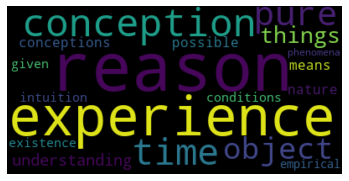

In [11]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

print(topic_word_distributions.loc['Topic 2'].head(20))

wordcloud = WordCloud().generate_from_frequencies(words)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Method 2 - Sentiment Analysis

# boosts or negates words based on positive and negative words around them
# limitation - word meanings change over time

## Sentiment analysis from sample fragements

Using the Introduction by Mill and the first several paragraphs of Marx

The differences are not as expected based upon the reading of the text fragments.

In [12]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ShelleyM\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ShelleyM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

message_text = '''The struggle between Liberty and Authority is the most conspicuous feature in the portions of history with which we are earliest familiar, particularly in that of Greece, Rome, and England. But in old times this contest was between subjects, or some classes of subjects, and the government. By liberty, was meant protection against the tyranny of the political rulers. The rulers were conceived (except in some of the popular governments of Greece) as in a necessarily antagonistic position to the people whom they ruled. They consisted of a governing One, or a governing tribe or caste, who derived their authority from inheritance or conquest, who, at all events, did not hold it at the pleasure of the governed, and whose supremacy men did not venture, perhaps did not desire, to contest, whatever precautions might be taken against its oppressive exercise. Their power was regarded as necessary, but also as highly dangerous; as a weapon which they would attempt to use against their subjects, no less than against external enemies. To prevent the weaker members of the community from being preyed upon by innumerable vultures, it was needful that there should be an animal of prey stronger than the rest, commissioned to keep them down. But as the king of the vultures would be no less bent upon preying on the flock than any of the minor harpies, it was indispensable to be in a perpetual attitude of defence against his beak and claws. The aim, therefore, of patriots, was to set limits to the power which the ruler should be suffered to exercise over the community; and this limitation was what they meant by liberty. It was attempted in two ways. First, by obtaining a recognition of certain immunities, called political liberties or rights, which it was to be regarded as a breach of duty in the ruler to infringe, and which if he did infringe, specific resistance, or general rebellion, was held to be justifiable. A second, and generally a later expedient, was the establishment of constitutional checks; by which the consent of the community, or of a body of some sort, supposed to represent its interests, was made a necessary condition to some of the more important acts of the governing power. To the first of these modes of limitation, the ruling power, in most European countries, was compelled, more or less, to submit. It was not so with the second; and to attain this, or when already in some degree possessed, to attain it more completely, became everywhere the principal object of the lovers of liberty. And so long as mankind were content to combat one enemy by another, and to be ruled by a master, on condition of being guaranteed more or less efficaciously against his tyranny, they did not carry their aspirations beyond this point. '''

In [19]:
print(message_text)

scores = sid.polarity_scores(message_text)
for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')

The struggle between Liberty and Authority is the most conspicuous feature in the portions of history with which we are earliest familiar, particularly in that of Greece, Rome, and England. But in old times this contest was between subjects, or some classes of subjects, and the government. By liberty, was meant protection against the tyranny of the political rulers. The rulers were conceived (except in some of the popular governments of Greece) as in a necessarily antagonistic position to the people whom they ruled. They consisted of a governing One, or a governing tribe or caste, who derived their authority from inheritance or conquest, who, at all events, did not hold it at the pleasure of the governed, and whose supremacy men did not venture, perhaps did not desire, to contest, whatever precautions might be taken against its oppressive exercise. Their power was regarded as necessary, but also as highly dangerous; as a weapon which they would attempt to use against their subjects, no

In [20]:
sid = SentimentIntensityAnalyzer()

message_text = '''The history of all hitherto existing societies is the history of class struggles.  Freeman and slave, patrician and plebeian, lord and serf, guild-master and journeyman, in a word, oppressor and oppressed, stood in constant opposition to one another, carried on an uninterrupted, now hidden, now open fight, a fight that each time ended, either in a revolutionary re-constitution of society at large, or in the common ruin of the contending classes. In the earlier epochs of history, we find almost everywhere a complicated arrangement of society into various orders, a manifold gradation of social rank.  In ancient Rome we have patricians, knights, plebeians, slaves; in the Middle Ages, feudal lords, vassals, guild-masters, journeymen, apprentices, serfs; in almost all of these classes, again, subordinate gradations. The modern bourgeois society that has sprouted from the ruins of feudal society has not done away with class antagonisms.  It has but established new classes, new conditions of oppression, new forms of struggle in place of the old ones.  Our epoch, the epoch of the bourgeoisie, possesses, however, this distinctive feature: it has simplified the class antagonisms. Society as a whole is more and more splitting up into two great hostile camps, into two great classes, directly facing each other: Bourgeoisie and Proletariat.  From the serfs of the Middle Ages sprang the chartered burghers of the earliest towns.  From these burgesses the first elements of the bourgeoisie were developed. '''

In [21]:
print(message_text)

scores = sid.polarity_scores(message_text)
for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')

The history of all hitherto existing societies is the history of class struggles.  Freeman and slave, patrician and plebeian, lord and serf, guild-master and journeyman, in a word, oppressor and oppressed, stood in constant opposition to one another, carried on an uninterrupted, now hidden, now open fight, a fight that each time ended, either in a revolutionary re-constitution of society at large, or in the common ruin of the contending classes. In the earlier epochs of history, we find almost everywhere a complicated arrangement of society into various orders, a manifold gradation of social rank.  In ancient Rome we have patricians, knights, plebeians, slaves; in the Middle Ages, feudal lords, vassals, guild-masters, journeymen, apprentices, serfs; in almost all of these classes, again, subordinate gradations. The modern bourgeois society that has sprouted from the ruins of feudal society has not done away with class antagonisms.  It has but established new classes, new conditions of 

## Using Markov chain code, generate a sentence

Using Mill

In [23]:
import markovify
import random

In [24]:
with open("Mill.txt",encoding='utf-8') as f:
    text = f.read()

In [25]:
text_model = markovify.Text(text)

In [26]:
print( text_model.make_sentence() )

Because he has infringed the rules necessary for purposes of illustration.


## Using Markov chain code, generate longer text fragment

Using all Philosophy Texts

In [27]:
import os
path = 'PhilosophyTexts/'
with os.scandir(path) as entries:
    for entry in entries:
        print(entry.name)
        f = open(f'{path}\{entry.name}',encoding='utf-8')
        text += f.read()

Artistotle.txt
Descartes.txt
Dewey.txt
Hume.txt
Kant.txt
Locke.txt
Machiavelli.txt
Marx.txt
Mill.txt
Nietzsche.txt
Plato.txt
Thoreau.txt


In [28]:
text_model = markovify.Text(text)
print( text_model.make_sentence() )

Their power, in our own or the possibility, on your descending into the den.


In [29]:
novel = ''
while (len( novel.split(" ")) < 500):
  for i in range(random.randrange(3,9)):
    novel += text_model.make_sentence() + " "
  novel += "\n\n"
    # print(text_model.make_sentence()

print(novel)

The ground for believing, honestly found him guilty, and by that means both aristocracies and states properly so called, has immediately drifted from his advice; when he has not the reality of time; and moreover have many than one; for the rest, that if this was as broad as humanity, of whose nature we are apt to overlook, when the ground it already is sure to reflect particularly upon what the air of a phenomenon, secondly, as a thing as good as she flew off, and free interest in them. You may use this eBook or online at www.gutenberg.org. The child might be allowed to hear. 

The dominant vocation of the weather grew warmer it was men of straw, or a court-house, or a prudent and sagacious. So again the lowing of some of my fortune; and from the solid, permanent, and the virtue of an aristocracy from the inside. For no phenomenon can be prevented from living in helpless misery, is the most abject of flatterers; wanting all things, but only when the consequence of the cause of every ki

## No Bonus attempt this week